**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from decouple import config
from sqlalchemy import create_engine, text
import warnings

sns.set_context('talk')
warnings.filterwarnings('ignore')

In [15]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [16]:
# Ejercicio 1.1: Crear una base de datos en SQLite utilizando la libreria [SQLalchemy]
database = create_engine('sqlite:///melbourne_df.sqlite3', echo=True)

In [17]:
# Ejercicio 1.2: Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.
melb_df = pd.read_csv('melb_data.csv')
melb_df.to_sql('melb_data', con=database, if_exists="replace")

2022-05-18 07:53:48,541 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-05-18 07:53:48,541 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:48,542 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-05-18 07:53:48,543 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:48,543 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-18 07:53:48,544 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:48,544 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb_data")
2022-05-18 07:53:48,545 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:48,546 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-18 07:53:48,546 INFO sqlalchemy.engine.Engine [raw sql] ('melb_data',)
2022-05-18 07:53:48,547 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("

13580

In [18]:
# Ejercicio 1.2: Ingestar los datos provistos de Airbnb y crear la tabla
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
    ]
airbnb_df = pd.read_csv('cleansed_listings_dec18.csv',usecols=interesting_cols)

# Unificar el typedata de la columna zipcode para luego poder hacer joins
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')
# Se crea la tabla en SQL
airbnb_df.to_sql('airbnb_data', con=database, if_exists="replace")


2022-05-18 07:53:49,188 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-05-18 07:53:49,188 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,189 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-05-18 07:53:49,189 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,190 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-18 07:53:49,191 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,191 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb_data")
2022-05-18 07:53:49,192 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,193 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-18 07:53:49,193 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2022-05-18 07:53:49,194 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_ke

2022-05-18 07:53:49,608 INFO sqlalchemy.engine.Engine COMMIT


22895

In [19]:
# Ejercicio 1.3: Implementar consultas en SQL que respondan con la siguiente información:
# Cantidad de registros por ciudad en airbnb_data
query1 = """SELECT city, COUNT(*) FROM airbnb_data
GROUP BY city
ORDER BY 2 DESC;""" 

# Cantidad de registros por ciudad y barrio (suburb) en airbnb_data
query2 = """SELECT city, suburb, COUNT(*) FROM airbnb_data
GROUP BY city, suburb
ORDER BY 3 DESC;"""

with database.connect() as con:
    query_result1 = pd.read_sql_query(query1, con)
    
query_result1

2022-05-18 07:53:49,632 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) FROM airbnb_data
GROUP BY city
ORDER BY 2 DESC;
2022-05-18 07:53:49,633 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,COUNT(*)
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


In [20]:
# Consulta de cantidad de registros por ciudad
with database.connect() as con:
    query_result1 = pd.read_sql_query(query1, con)
    query_result2 = pd.read_sql_query(query2, con)
    
query_result1

2022-05-18 07:53:49,653 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) FROM airbnb_data
GROUP BY city
ORDER BY 2 DESC;
2022-05-18 07:53:49,654 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,668 INFO sqlalchemy.engine.Engine SELECT city, suburb, COUNT(*) FROM airbnb_data
GROUP BY city, suburb
ORDER BY 3 DESC;
2022-05-18 07:53:49,668 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,COUNT(*)
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


## Ejercicio 1.4: Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

En este ejercicio se sigue el siguiente procedimiento:
    1- sobre la tabla de Airbnb se calcula el promedio de los precios diarios, semana y mensual y se pasa a una tabla nueva;
    2- luego se hace el JOIN con la tabal de Melbourne usando como pivote el zipcode

In [21]:
# Se calcula el promedio para el precio diario (price), semanal y mensual
query3 = """SELECT zipcode,
AVG(price) avg_dayly_price,
AVG(weekly_price) avg_weekly_price,
AVG(monthly_price) avg_montly_price
FROM airbnb_data
GROUP BY zipcode
;"""

with database.connect() as con:
    result_query3 = pd.read_sql_query(query3, con)

result_query3.to_sql('zipcode_average_prices', con=database, if_exists="replace")  
# result_query3


2022-05-18 07:53:49,696 INFO sqlalchemy.engine.Engine SELECT zipcode,
AVG(price) avg_dayly_price,
AVG(weekly_price) avg_weekly_price,
AVG(monthly_price) avg_montly_price
FROM airbnb_data
GROUP BY zipcode
;
2022-05-18 07:53:49,697 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,717 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("zipcode_average_prices")
2022-05-18 07:53:49,717 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,718 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("zipcode_average_prices")
2022-05-18 07:53:49,718 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,719 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-18 07:53:49,719 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,720 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("zipcode_average_prices")
2022-05-18 07:53:49,720 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 07:53:49,721 INFO sq

248

In [22]:
# Se hace un INNER JOIN de la tabla de datos Melbourne con la de precios promedios y se crea la tabla
query4 = """SELECT *
from kaggle_data 
INNER JOIN zipcode_average_prices ON zipcode_average_prices.zipcode = kaggle_data.Postcode
"""
with database.connect() as con:
    result_query4 = pd.read_sql_query(query4, con)

# Se escribe el archivo .csv extendidoo para el proximo ejercicio
result_query4.to_csv("melb_data_extended.csv", index=None)



2022-05-18 07:53:49,748 INFO sqlalchemy.engine.Engine SELECT *
from kaggle_data 
INNER JOIN zipcode_average_prices ON zipcode_average_prices.zipcode = kaggle_data.Postcode

2022-05-18 07:53:49,749 INFO sqlalchemy.engine.Engine [raw sql] ()


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Ejercicio 2.1 - Seleccionar un subconjunto de columnas que les parezca relevantes al problema de prediccion

In [24]:
# Ejercicio 2.1: Cargo desde la fila de datos extendido con que termina el ejercicio anterior
combined_df = pd.read_csv('melb_data_extended.csv', index_col='index')
combined_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'index.1', 'zipcode',
       'avg_dayly_price', 'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [26]:
#Ejercicio 2.1: Identifico variables categoricas y numericas
categorical_data = combined_df.select_dtypes(include=[np.object]).columns
numerical_data = combined_df.select_dtypes(include=[np.number]).columns
print(f'Variables Categóricas {categorical_data}')
print(f'Variables Categóricas {numerical_data}')

Variables Categóricas Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
Variables Categóricas Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'index.1', 'zipcode', 'avg_dayly_price',
       'avg_weekly_price', 'avg_montly_price'],
      dtype='object')


In [27]:
# Ejercicio 2.1: Saco las variables categóricas del dataframe
combined_df_numeric_variables = combined_df.drop(categorical_data, axis=1, inplace=False)
combined_df_numeric_variables.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'index.1', 'zipcode', 'avg_dayly_price',
       'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [28]:
#Ejercicio 2.1: Acá hago una correlación entre todas las variables para ver cual tiene alguna correlacion con el Precio
correlation = combined_df_numeric_variables.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,index.1,zipcode,avg_dayly_price,avg_weekly_price,avg_montly_price
Rooms,1.000000,0.497624,0.294851,0.053038,0.944103,0.592939,0.408135,0.022851,0.420810,-0.065754,0.012829,0.104580,-0.080698,0.021372,0.053038,-0.057295,-0.139931,-0.115336
Price,0.497624,1.000000,-0.161500,0.110992,0.476939,0.467269,0.239609,0.038107,0.362553,-0.323706,-0.211876,0.202667,-0.043389,0.221408,0.110992,0.199149,0.223097,0.221397
Distance,0.294851,-0.161500,1.000000,0.420157,0.296510,0.127443,0.263464,0.012490,0.115001,0.248974,-0.158092,0.267753,-0.049229,0.292084,0.420157,-0.149899,-0.314304,-0.252524
Postcode,0.053038,0.110992,0.420157,1.000000,0.058313,0.113449,0.048497,0.017333,0.057903,0.032169,-0.427444,0.464716,0.066257,0.826772,1.000000,0.208604,0.277054,0.303709
Bedroom2,0.944103,0.476939,0.296510,0.058313,1.000000,0.584687,0.404964,0.022801,0.411895,-0.053662,0.012735,0.106127,-0.080487,0.027468,0.058313,-0.056407,-0.140561,-0.117162
Bathroom,0.592939,0.467269,0.127443,0.113449,0.584687,1.000000,0.321670,0.034481,0.376205,0.152384,-0.072449,0.121088,-0.052159,0.115960,0.113449,0.046461,0.029457,0.044360
Car,0.408135,0.239609,0.263464,0.048497,0.404964,0.321670,1.000000,0.022935,0.229974,0.104041,-0.005240,0.066753,-0.023282,0.023396,0.048497,-0.025718,-0.123992,-0.095874
Landsize,0.022851,0.038107,0.012490,0.017333,0.022801,0.034481,0.022935,1.000000,0.071380,0.035792,0.001276,0.019310,-0.004443,0.004327,0.017333,0.005008,0.009297,0.005100
BuildingArea,0.420810,0.362553,0.115001,0.057903,0.411895,0.376205,0.229974,0.071380,1.000000,0.019245,-0.032009,0.086397,-0.047889,0.055058,0.057903,0.015105,-0.028239,-0.011059
YearBuilt,-0.065754,-0.323706,0.248974,0.032169,-0.053662,0.152384,0.104041,0.035792,0.019245,1.000000,0.059887,-0.002939,0.006666,-0.023372,0.032169,-0.074902,-0.105522,-0.082271


In [29]:
##Ejercicio 2.1: Selecciono las columnas donde veo una correlacion mayor a 0.3, porque asumo que son mas relevantes
interesting_columns=['Price','Rooms','Bathroom','BuildingArea','YearBuilt']
filtered_combined_df=combined_df[interesting_columns]
filtered_combined_df.isnull().sum()

Price              0
Rooms              0
Bathroom           0
BuildingArea    6441
YearBuilt       5365
dtype: int64

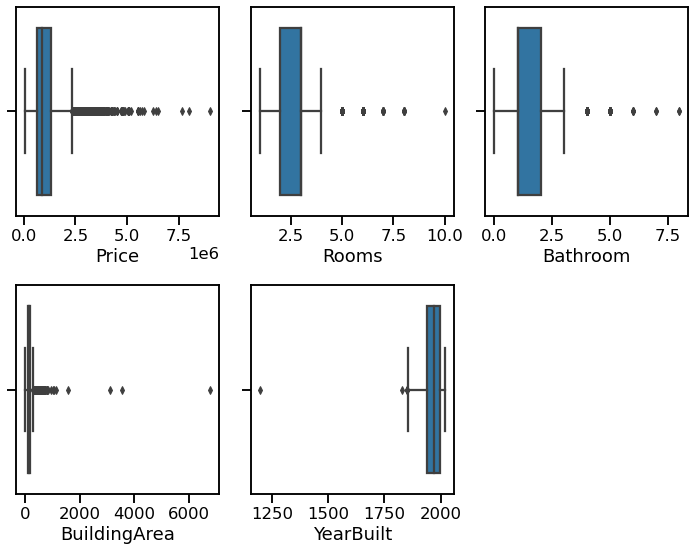

In [71]:
#Ejercicio 2.1: Veo como es la distribución de los datos usando boxplots -  Hay outliers en todas
fig = plt.figure(figsize=(10,8))
c = 1
for column in filtered_combined_df.columns:
    plt.subplot(2, 3, c)
    sns.boxplot(filtered_combined_df[column])
    c += 1
plt.tight_layout()

In [31]:
# #Ejercicio 2.1: Acá defino un función para calculo los quartiles y los límites minimo y maximo y conteo de outliers
lista_outliers = []
def ident_outliers(df):
    q25, q75 = np.quantile(df, 0.25), np.quantile(df, 0.75)
    iqr = q75 - q25
    minimo = q25 - 1.5 * iqr
    maximo = q75 + 1.5 * iqr
    for i in df:
        if i >= maximo or i <= minimo:
            lista_outliers.append(i)            
    print('Outliers:', len(lista_outliers))

# Me fijo en cada columna cuantos outliers hay    
for column in filtered_combined_df.columns:
    print(column)
    ident_outliers(filtered_combined_df[column])    


Price
Outliers: 624
Rooms
Outliers: 1304
Bathroom
Outliers: 1447
BuildingArea
Outliers: 1447
YearBuilt
Outliers: 1447


In [37]:
# #Ejercicio 2.1: Me parece mas relevante sacar los outliers de la variable precio

def saca_outliers(df, column):
    df_copy = df.copy()
    iqr = 1.5 * (np.percentile(df[column], 75) - np.percentile(df[column], 25))
    df_copy.drop(df_copy[df_copy[column] >= (iqr + np.percentile(df_copy[column], 75))].index, inplace=True)
    df_copy.drop(df_copy[df_copy[column] <= (np.percentile(df_copy[column], 25) - iqr)].index, inplace=True)    
    return df_copy #, minimo, maximo, q25, q75, iqr
                    
dataframe_limpio = saca_outliers(filtered_combined_df,'Price')
dataframe_limpio.describe()

,Price,Rooms,Bathroom,BuildingArea,YearBuilt
count,1.293600e+04,12936.000000,12936.000000,6755.000000,7788.000000
mean,9.819128e+05,2.883503,1.486163,138.419249,1965.758860
std,4.529673e+05,0.927668,0.638993,120.923199,36.569973
min,8.500000e+04,1.000000,0.000000,0.000000,1196.000000
25%,6.380000e+05,2.000000,1.000000,91.000000,1950.000000
50%,8.800000e+05,3.000000,1.000000,122.000000,1970.000000
75%,1.270000e+06,3.000000,2.000000,165.000000,2000.000000
max,2.345000e+06,10.000000,8.000000,6791.000000,2018.000000


<AxesSubplot:xlabel='Price'>

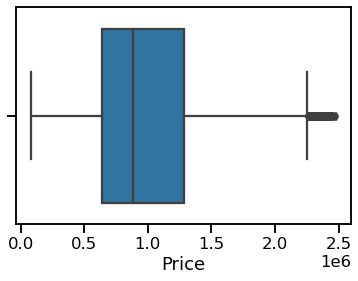

In [108]:
#Ejercicio 2.1: boxplot sobre precio muestra que sigue habiendo outliers

sns.boxplot(dataframe_limpio['Price'])

<AxesSubplot:xlabel='Price'>

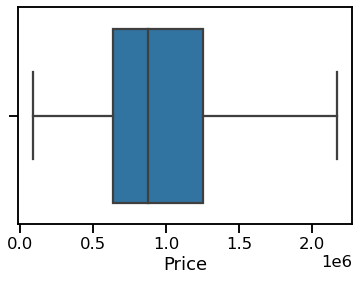

In [39]:
#Ejercicio 2.1: Aplico una secuencia de filtrado de outlier hasta que el boxplot queda limpio

dataframe_limpio2 = saca_outliers(dataframe_limpio,'Price')
len(dataframe_limpio2)
#sns.boxplot(dataframe_limpio2['Price'])

dataframe_limpio3 = saca_outliers(dataframe_limpio2,'Price')
len(dataframe_limpio3)
#sns.boxplot(dataframe_limpio3['Price'])

dataframe_limpio4 = saca_outliers(dataframe_limpio3,'Price')
len(dataframe_limpio4)
sns.boxplot(dataframe_limpio4['Price'])

### Ejercicio 2.2: Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

Acá no entiendo el objetivo, ya del ejercicio anterior tengo la tabla con unión de los datos

### Ejercicio 2.3: Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

La unión a través de lo zipcodes me parece que fué suficiente.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [41]:
# Ejercicio 3: guardo una fila .csv con el dataframe limpio son outliers sobre el precio

dataframe_limpio4.to_csv('DataFrame-Parte1.csv')

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)